## Imports

In [187]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [188]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [189]:
df = pd.read_csv('procedures1.csv')

In [190]:
df.shape

(51402, 36)

In [191]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
3            0              0             0        0    0   7.340278   
4            0              0             0        0    0  10.945139   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
3                 0                 0.0                  83  83.0    M  Black   
4                 0                 0.0                  79   NaN  NaN    NaN   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
3    4                  0                   0        1            NaN   
4    0                  0                   0        0            3.7   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
3                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
3           0.0            1     6                0          0         NaN   
4           1.0            0     5                0          0  119.872691   

  eGFR_classification  LVR  preop_hb preop_hb_classification  
0      Kidney Disease    0      13.5                  >= 9.0  
1                 NaN    0       NaN                 Unknown  
2              Normal    0      12.9                  >= 9.0  
3                 NaN    1       9.0                  >= 9.0  
4              Normal    0      14.4                  >= 9.0

In [192]:
ne_df = df[df['non_elective'] == 1]

In [193]:
ne_df.shape

(37910, 36)

In [194]:
ne_df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   
5  055c909b-ccb7-4ec5-8526-687661a865c1  4e35bdd1-8b3b-458c-8efc-c47201b66049   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
4            0              0             0        0    0  10.945139   
5            0              0             0        0    0   9.743750   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
4                 0                 0.0                  79   NaN  NaN    NaN   
5                 0                 0.0                  76  48.0    M  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
4    0                  0                   0        0            3.7   
5    2                  0                   0        1            3.9   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   
5                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   
5                  Unknown       0.60                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
4           1.0            0     5                0          0  119.872691   
5           1.0            0     6                1          0  118.893072   

  eGFR_classification  LVR  preop_hb preop_hb_classification  
0      Kidney Disease    0      13.5                  >= 9.0  
1                 NaN    0       NaN                 Unknown  
2              Normal    0      12.9                  >= 9.0  
4              Normal    0      14.4                  >= 9.0  
5              Normal    1      13.9                  >= 9.0

In [195]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification'],
      dtype='object')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51402 entries, 0 to 51401
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      51402 non-null  object 
 1   encounterid                   51402 non-null  object 
 2   pre_albumin                   51402 non-null  int64  
 3   early_albumin                 51402 non-null  int64  
 4   late_albumin                  51402 non-null  int64  
 5   albumin                       51402 non-null  int64  
 6   ICU                           51402 non-null  int64  
 7   LOS_days                      51402 non-null  float64
 8   90_day_mortality              51402 non-null  int64  
 9   90_day_readmission            46846 non-null  float64
 10  hospital_free_days            51402 non-null  int64  
 11  age                           50603 non-null  float64
 12  sex                           50581 non-null  object 
 13  r

In [197]:
df.isnull().sum()

personid                            0
encounterid                         0
pre_albumin                         0
early_albumin                       0
late_albumin                        0
albumin                             0
ICU                                 0
LOS_days                            0
90_day_mortality                    0
90_day_readmission               4556
hospital_free_days                  0
age                               799
sex                               821
race                             3273
CCI                                 0
preop_hypotension                   0
postop_hypotension                  0
MAKE_90                             0
preop_albumin                   35606
preop_albumin_classification        0
postop_albumin                  42845
preop_inr                       50762
preop_inr_classification            0
preop_scr                       17664
preop_scr_classification            0
transfusion                         0
non_elective

In [198]:
df.early_albumin.value_counts()

0    49306
1     2096
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [199]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    2096.000000
mean       20.118692
std        27.520327
min         0.111111
25%         7.273958
50%        13.094097
75%        23.273160
max       532.831250
Name: LOS_days, dtype: float64

In [200]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    49306.000000
mean        15.883797
std         22.536854
min          0.000000
25%          6.241667
50%         10.324381
75%         17.763047
max        742.281944
Name: LOS_days, dtype: float64

In [201]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    1668
1     428
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 20.419847328244277


In [202]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    45178
1     4128
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 8.372206222366446


In [203]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    1026
1.0     642
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 38.489208633093526


In [204]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    29532
1.0    15646
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 34.63190048253575


In [205]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
3            0              0             0        0    0   7.340278   
4            0              0             0        0    0  10.945139   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
3                 0                 0.0                  83  83.0    M  Black   
4                 0                 0.0                  79   NaN  NaN    NaN   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
3    4                  0                   0        1            NaN   
4    0                  0                   0        0            3.7   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
3                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
3           0.0            1     6                0          0         NaN   
4           1.0            0     5                0          0  119.872691   

  eGFR_classification  LVR  preop_hb preop_hb_classification  
0      Kidney Disease    0      13.5                  >= 9.0  
1                 NaN    0       NaN                 Unknown  
2              Normal    0      12.9                  >= 9.0  
3                 NaN    1       9.0                  >= 9.0  
4              Normal    0      14.4                  >= 9.0

In [206]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification']


In [207]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification']]

In [208]:
df_a24.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

   pre_albumin  early_albumin  late_albumin  ICU   LOS_days  90_day_mortality  \
0            1              1             1    1   7.501667                 0   
1            0              0             0    0  16.273611                 0   
2            0              0             0    0  23.962500                 0   
3            0              0             0    0   7.340278                 0   
4            0              0             0    0  10.945139                 0   

   90_day_readmission  hospital_free_days  sex   race  postop_hypotension  \
0                 0.0                  74    M  White                   1   
1                 1.0                  64    M  White                   0   
2                 1.0                  50    M  White                   0   
3                 0.0                  83    M  Black                   0   
4                 0.0                  79  NaN    NaN                   0   

   MAKE_90  preop_albumin preop_albumin_classification  postop_albumin  \
0        1            NaN                      Unknown             NaN   
1        1            NaN                      Unknown             NaN   
2        1            NaN                      Unknown             NaN   
3        1            NaN                      Unknown             NaN   
4        0            3.7                       Normal             NaN   

   preop_inr preop_inr_classification  preop_scr preop_scr_classification  \
0        NaN                  Unknown       1.66                     High   
1        NaN                  Unknown        NaN                  Unknown   
2        NaN                  Unknown        NaN                  Unknown   
3        NaN                  Unknown        NaN                  Unknown   
4        NaN                  Unknown       0.80                   Normal   

   transfusion  non_elective        eGFR eGFR_classification  LVR  preop_hb  \
0            0           1.0   47.010980      Kidney Disease    0      13.5   
1            0           1.0         NaN                 NaN    0       NaN   
2            0           1.0  219.920238              Normal    0      12.9   
3            0           0.0         NaN                 NaN    1       9.0   
4            0           1.0  119.872691              Normal    0      14.4   

  preop_hb_classification  
0                  >= 9.0  
1                 Unknown  
2                  >= 9.0  
3                  >= 9.0  
4                  >= 9.0

In [209]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification'], inplace=True)

In [210]:
df.shape

(51402, 9)

In [211]:
df.head()

encounterid  albumin   age  CCI  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e        1  51.0    0   
1  29013b3b-a508-4d8e-b5ed-b0c02408ede9        0  74.0    5   
2  aed18cec-c00c-4a6d-8706-c1c21c970100        0   1.0    0   
3  8ca906ac-0956-408f-a725-5c35a307c09e        0  83.0    4   
4  7e1dfe1e-d039-4e4e-9040-acb6218e90a0        0   NaN    0   

   preop_hypotension  vasopressor  NEWS  bl_hypertension  preop_MAP  
0                  1            1     8                0          0  
1                  0            0     1                1          0  
2                  1            0     6                0          0  
3                  0            1     6                0          0  
4                  0            0     5                0          0

In [212]:
df.isnull().sum()

encounterid            0
albumin                0
age                  799
CCI                    0
preop_hypotension      0
vasopressor            0
NEWS                   0
bl_hypertension        0
preop_MAP              0
dtype: int64

In [213]:
df.dropna(inplace=True)

In [214]:
df.shape

(50603, 9)

In [215]:
df.albumin.value_counts()

0    35473
1    15130
Name: albumin, dtype: int64

In [216]:
df.head()

encounterid  albumin   age  CCI  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e        1  51.0    0   
1  29013b3b-a508-4d8e-b5ed-b0c02408ede9        0  74.0    5   
2  aed18cec-c00c-4a6d-8706-c1c21c970100        0   1.0    0   
3  8ca906ac-0956-408f-a725-5c35a307c09e        0  83.0    4   
5  4e35bdd1-8b3b-458c-8efc-c47201b66049        0  48.0    2   

   preop_hypotension  vasopressor  NEWS  bl_hypertension  preop_MAP  
0                  1            1     8                0          0  
1                  0            0     1                1          0  
2                  1            0     6                0          0  
3                  0            1     6                0          0  
5                  0            0     6                1          0

## Initialize PsmPy Class

In [217]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [218]:
%%time
psm.logistic_ps(balance = True)

Wall time: 1min 53s


In [219]:
df_psm = psm.predicted_data

In [220]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e  51.0    0                  1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0   
2  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0   
3  66500e5e-3f96-4777-bd80-f78871d210bb  61.0    0                  0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7  84.0    2                  0   

   vasopressor  NEWS  bl_hypertension  preop_MAP  propensity_score  \
0            1     8                0          0          0.761668   
1            0     4                0          0          0.424704   
2            0     0                0          0          0.287076   
3            0     0                0          0          0.282380   
4            1     4                0          0          0.533435   

   propensity_logit  albumin  
0          1.161847        1  
1         -0.303491        1  
2         -0.909627        1  
3         -0.932689        1  
4          0.133938        1

## Plot the propensity score / propensity logits

In [221]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 20h 59min 51s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


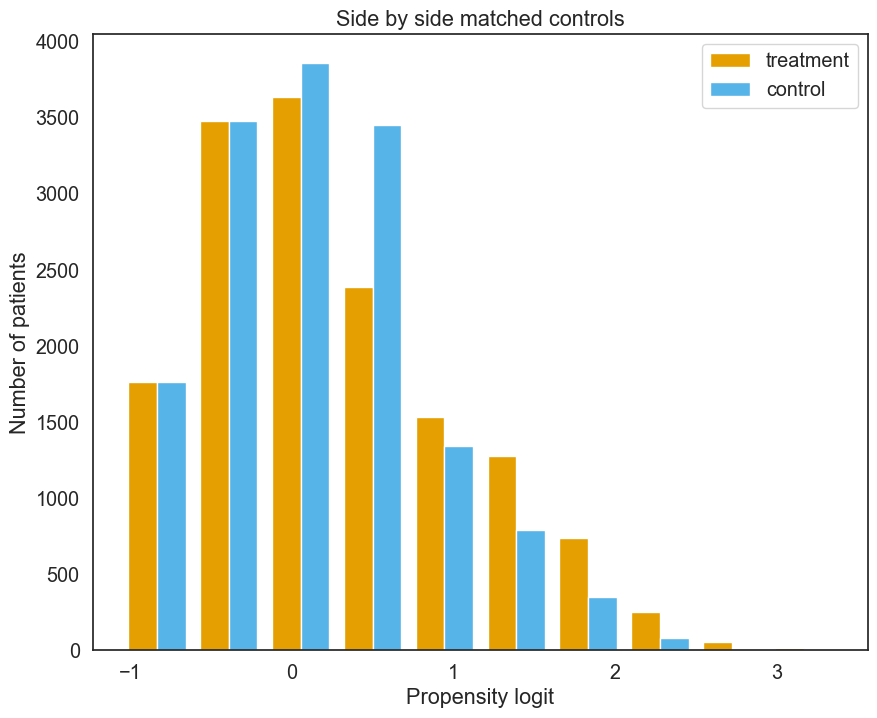

In [222]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

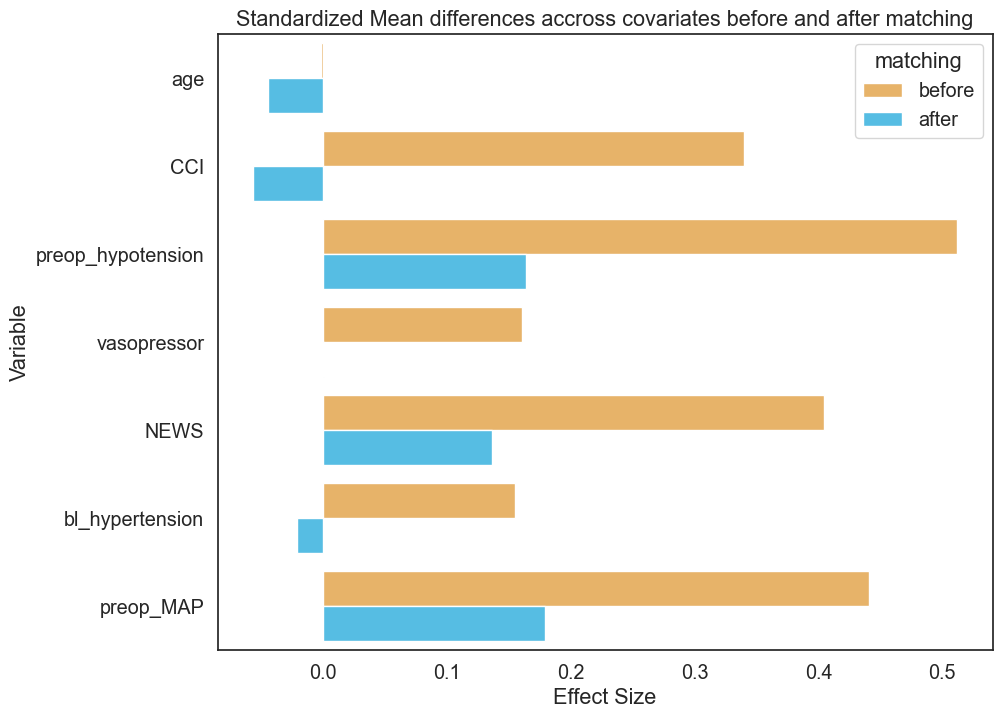

In [223]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [224]:
matched_df = psm.df_matched

In [225]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e  51.0    0                  1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0   
2  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0   
3  66500e5e-3f96-4777-bd80-f78871d210bb  61.0    0                  0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7  84.0    2                  0   

   vasopressor  NEWS  bl_hypertension  preop_MAP  propensity_score  \
0            1     8                0          0          0.761668   
1            0     4                0          0          0.424704   
2            0     0                0          0          0.287076   
3            0     0                0          0          0.282380   
4            1     4                0          0          0.533435   

   propensity_logit  albumin  
0          1.161847        1  
1         -0.303491        1  
2         -0.909627        1  
3         -0.932689        1  
4          0.133938        1

In [226]:
matched_df.shape

(30259, 11)

## Matched Ids

In [227]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  745b5292-7fbd-45a5-a220-5678b9665f5e  23799507-6122-47d7-9128-884c4810c3c5
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  06405a1b-be84-4cd3-bb0e-4e932fe1e0b7
2  d876535a-c09a-4db1-b3d4-361d3af60734  8e9432e8-9c40-49cd-83ad-4d3a5ccfa3fe
3  66500e5e-3f96-4777-bd80-f78871d210bb  9967c91b-6595-4425-9be8-9c98b20c165d
4  f3cc07b4-8f88-4379-9a60-8973799e70c7  0241960e-8eb9-44f4-9187-e4785b716055

## Effect sizes per variables

In [228]:
psm.effect_size

Variable matching  Effect Size
0                 age   before    -0.001581
1                 age    after    -0.044215
2                 CCI   before     0.339853
3                 CCI    after    -0.056874
4   preop_hypotension   before     0.512045
5   preop_hypotension    after     0.163546
6         vasopressor   before     0.160295
7         vasopressor    after     0.000639
8                NEWS   before     0.404273
9                NEWS    after     0.136602
10    bl_hypertension   before     0.154787
11    bl_hypertension    after    -0.020829
12          preop_MAP   before     0.440495
13          preop_MAP    after     0.179537

## Explore Matched df

In [229]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e  51.0    0                  1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0   
2  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0   
3  66500e5e-3f96-4777-bd80-f78871d210bb  61.0    0                  0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7  84.0    2                  0   

   vasopressor  NEWS  bl_hypertension  preop_MAP  propensity_score  \
0            1     8                0          0          0.761668   
1            0     4                0          0          0.424704   
2            0     0                0          0          0.287076   
3            0     0                0          0          0.282380   
4            1     4                0          0          0.533435   

   propensity_logit  albumin  
0          1.161847        1  
1         -0.303491        1  
2         -0.909627        1  
3         -0.932689        1  
4          0.133938        1

In [230]:
matched_df.albumin.value_counts()

1    15130
0    15129
Name: albumin, dtype: int64

In [231]:
matched_df.shape

(30259, 11)

## Join Matched df with earlier df on encounterid to add outcome variables

In [232]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [233]:
f_df.shape

(30259, 38)

In [234]:
f_df.head()

encounterid   age  CCI  preop_hypotension  \
0  745b5292-7fbd-45a5-a220-5678b9665f5e  51.0    0                  1   
1  9226fe26-3d9c-45e7-a5e2-cb3ea73c5612  71.0    1                  0   
2  d876535a-c09a-4db1-b3d4-361d3af60734  68.0    0                  0   
3  66500e5e-3f96-4777-bd80-f78871d210bb  61.0    0                  0   
4  f3cc07b4-8f88-4379-9a60-8973799e70c7  84.0    2                  0   

   vasopressor  NEWS  bl_hypertension  preop_MAP  propensity_score  \
0            1     8                0          0          0.761668   
1            0     4                0          0          0.424704   
2            0     0                0          0          0.287076   
3            0     0                0          0          0.282380   
4            1     4                0          0          0.533435   

   propensity_logit  albumin                              personid  \
0          1.161847        1  012e7384-a301-4dcc-9b65-55b973fd323f   
1         -0.303491        1  05c8fa00-1952-4a70-b50e-af551c2d6e21   
2         -0.909627        1  09b1c3e8-45c3-4702-8c30-676bd316e419   
3         -0.932689        1  0aad16b9-b2db-4f86-86d1-ce55179e2501   
4          0.133938        1  0c567c68-6c3b-48b3-9a63-377ae2669e2a   

   pre_albumin  early_albumin  late_albumin  ICU   LOS_days  90_day_mortality  \
0            1              1             1    1   7.501667                 0   
1            1              0             0    0   2.987500                 1   
2            0              0             1    1   5.770833                 0   
3            0              0             1    1  11.174306                 0   
4            0              0             1    1  12.611725                 1   

   90_day_readmission  hospital_free_days sex     race  postop_hypotension  \
0                 0.0                  74   M    White                   1   
1                 NaN                   0   M  Unknown                   0   
2                 0.0                  81   F    White                   1   
3                 1.0                  74   M    White                   1   
4                 NaN                   0   M    Other                   1   

   MAKE_90  preop_albumin preop_albumin_classification  postop_albumin  \
0        1            NaN                      Unknown             NaN   
1        1            1.1                          Low             NaN   
2        0            NaN                      Unknown             NaN   
3        1            NaN                      Unknown             3.1   
4        1            2.7                          Low             1.6   

   preop_inr preop_inr_classification  preop_scr preop_scr_classification  \
0        NaN                  Unknown       1.66                     High   
1        NaN                  Unknown       4.15                     High   
2        NaN                  Unknown       0.60                   Normal   
3        NaN                  Unknown       1.18                   Normal   
4        NaN                  Unknown       2.10                     High   

   transfusion  non_elective       eGFR   eGFR_classification  LVR  preop_hb  \
0            0           1.0  47.010980        Kidney Disease    0      13.5   
1            0           1.0  13.491952        Kidney Failure    0       8.9   
2            0           1.0  93.657224                Normal    0      14.3   
3            0           1.0  66.205965  Early Kidney Disease    0       NaN   
4            1           1.0  28.058991        Kidney Disease    0       NaN   

  preop_hb_classification  
0                  >= 9.0  
1               8.0 - 8.9  
2                  >= 9.0  
3                 Unknown  
4                 Unknown

In [235]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification']


In [236]:
f_df.albumin.value_counts()

1    15130
0    15129
Name: albumin, dtype: int64

In [237]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    2091.000000
mean       20.113729
std        27.547489
min         0.111111
25%         7.273611
50%        13.084028
75%        23.231597
max       532.831250
Name: LOS_days, dtype: float64

In [238]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    28168.000000
mean        19.277033
std         27.206832
min          0.000000
25%          7.278819
50%         12.249306
75%         21.264063
max        742.281944
Name: LOS_days, dtype: float64

In [239]:
f_df[f_df['early_albumin'] == 1].days_until_readmission.describe()

AttributeError: 'DataFrame' object has no attribute 'days_until_readmission'

In [ ]:
f_df[f_df['early_albumin'] == 0].days_until_readmission.describe()

In [ ]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [ ]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

In [ ]:
mrate(m)

In [ ]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

In [ ]:
mrate(m1)

In [ ]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

In [ ]:
rrate(r)

In [ ]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

In [ ]:
rrate(r1)

In [ ]:
f_df.to_csv('procedures_psm_matched_1.csv', index=False)